# Results and Analysis

This section presents the results of training **PPO** and **A2C** agents on the multi-page web application testing environment.  
All graphs below are smoothed using a **200-episode rolling window** to remove noise and highlight learning trends.  
The plots focus on three key evaluation metrics:

- **Episode Reward:** total reward per episode, representing overall learning performance.  
- **Completion Rate:** proportion of episodes reaching the final submission page.  
- **Match Ratio:** accuracy of the submitted form data compared to the ground truth.  

Subsequent figures analyze how **reward tuning** impacted the performance of individual sub-environments
(`ExperienceEnv` and `QuestionsEnv`), demonstrating how refined rewards guided better policy learning and page transitions.

### Figure 1. Learning Curve – PPO vs A2C


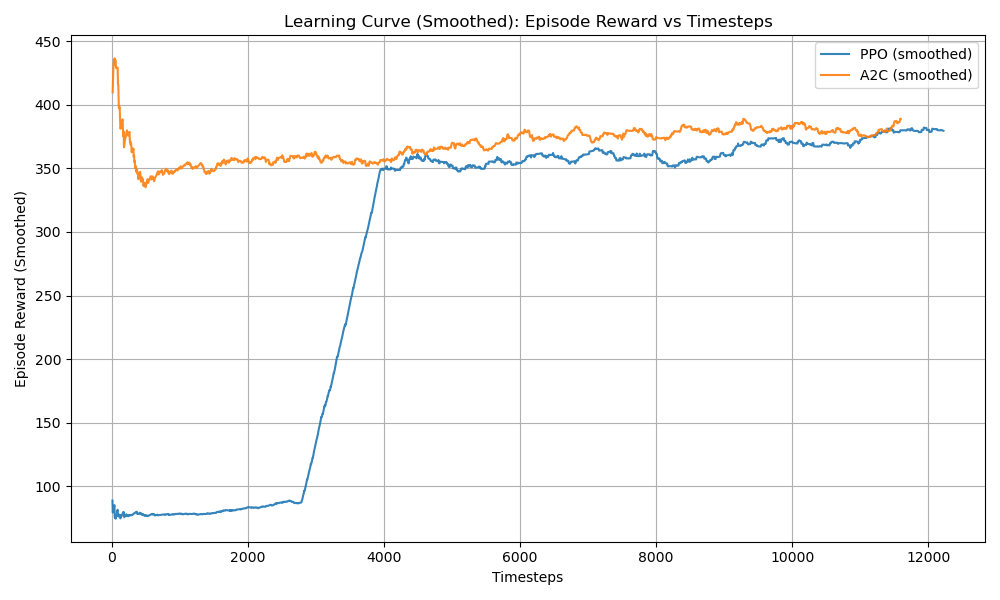

In [30]:

from IPython.display import Image
Image(filename="Images/learning_curve_ppo_a2c.png", width=700)

**Observation:**  
The smoothed learning curves for PPO and A2C show overall episode rewards over training timesteps.  
- A2C begins with a higher average reward and stabilizes early.  
- PPO starts lower, remains flat for a few thousand steps, and then shows a **sharp rise** once rewards were rebalanced mid-training.  
After this change, PPO converges to a stable high reward, matching A2C’s performance.

**Findings:**  
- A2C exhibits **faster early convergence**, while PPO demonstrates **greater adaptability** after reward modification.  
- The distinct upward spike corresponds to a training pause and **reward redesign**, confirming the effectiveness of the updated incentives.

### Figure 2. Completion Rate Over Time – PPO vs A2C


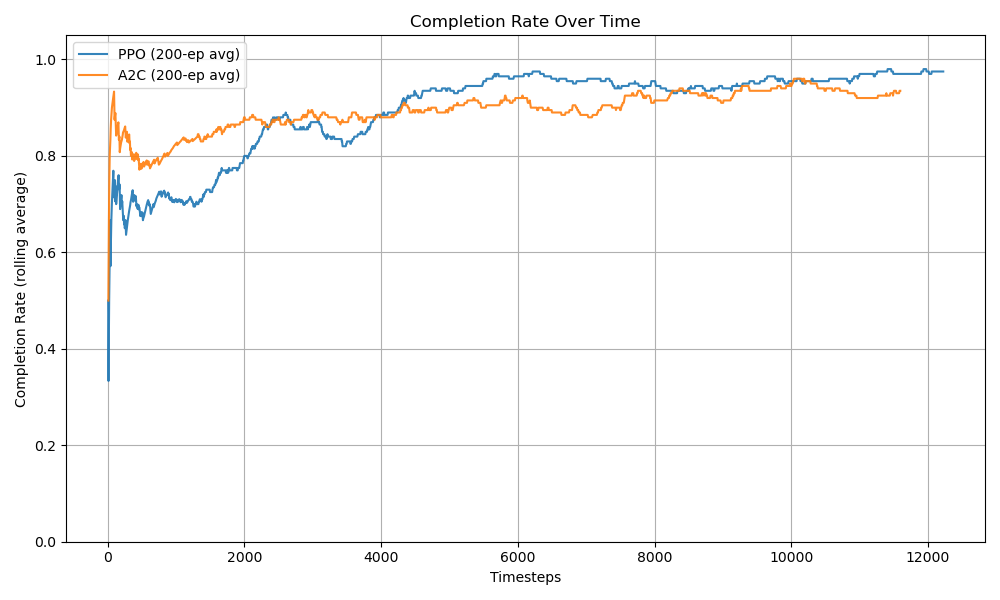

In [31]:
Image(filename="Images/completion_rate_ppo_a2c.png", width=700)

**Observation:**  
Completion rate represents how frequently the agent reached the final submission page (“done”).  
Both algorithms improved steadily, with A2C initially ahead (≈0.85–0.9) and PPO catching up later.  
After reward tuning, PPO surpassed A2C, reaching and maintaining **nearly 100% completion**.

**Findings:**  
- **Reward shaping directly improved PPO’s long-term task completion ability.**  
- Both models converged to high reliability (>95%), showing stable task-level learning.  
- PPO’s final plateau near 1.0 demonstrates robust policy generalization across the full webflow.

### Figure 3. Match Ratio Over Time – PPO vs A2C


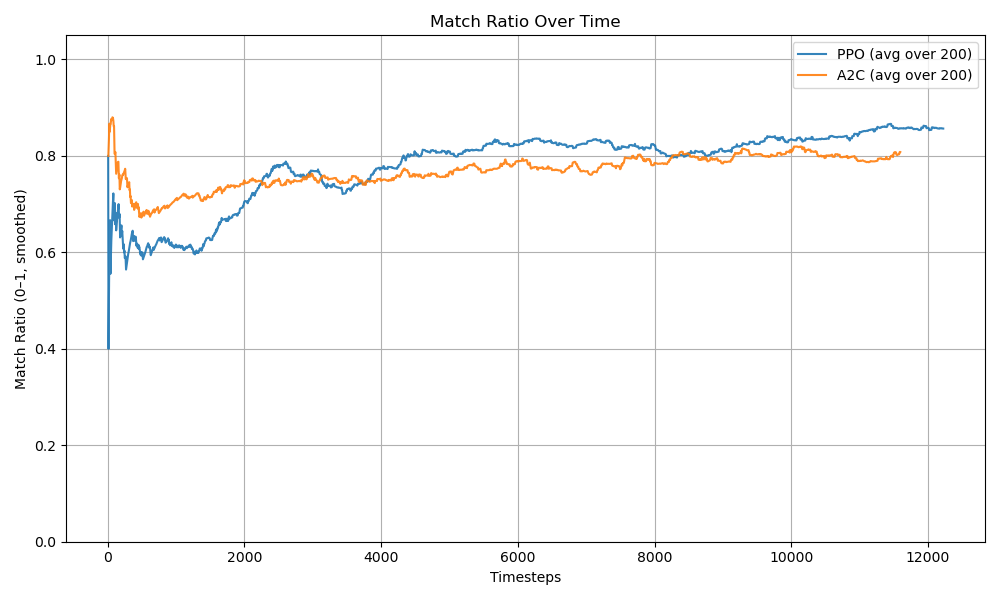

In [32]:
Image(filename="Images/ratio_match_ppo_a2c.png", width=700)

**Observation:**  
The match ratio measures form accuracy (0–1) based on how closely the submitted data matches expected ground truth.  
- PPO begins around 0.6 and steadily improves to ~0.87.  
- A2C starts higher but remains nearly flat around 0.8.  

**Findings:**  
- PPO’s accuracy improved consistently after reward adjustments, correlating with its higher completion rate.  
- This confirms that **reward design not only encouraged completion but also enhanced data correctness**.  
- A2C shows reliable but less sensitive improvement to reward changes, indicating more conservative learning behavior.


## Page-Level Reward Tuning Analysis
The following figures show how step-by-step reward redesign influenced specific sub-environments:
#### ExperienceEnv and QuestionsEnv 
Each experiment compares different reward setups (Failed vs Passed trainings) to visualize learning progression and outcomes.

### Figure 4. ExperienceEnv – Reward Tuning and Page Transition Outcomes


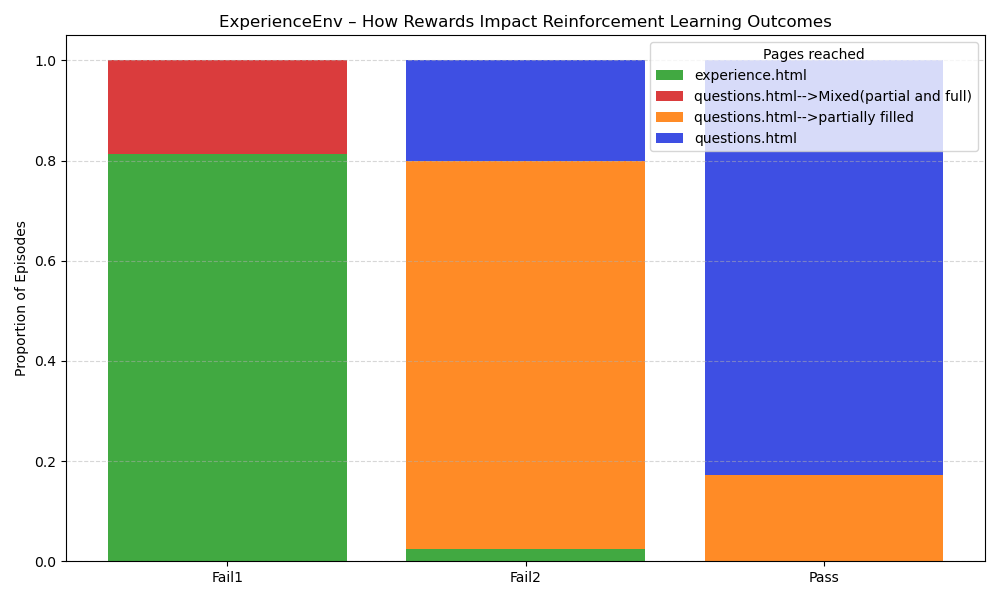

In [33]:
Image(filename="Images/experience_reward_outcomes.png", width=700)

**Observation:**  
This figure compares the distribution of episode outcomes for the Experience page under three reward setups:
- **Fail1:** Most episodes terminated on `experience.html` (agent stuck).  
- **Fail2:** Partial transitions occurred; some episodes reached `questions.html`.  
- **Pass:** Majority of episodes successfully advanced beyond the Experience page.  

**Findings:**  
- Incremental reward tuning had a **progressive positive impact**.  
- Adding a transition bonus and partial completion rewards enabled the agent to **consistently learn correct navigation**.  
- The “Pass” configuration produced **stable forward progression**, validating the improved incentive structure.


### Figure 5. QuestionsEnv – Learning to Reach Next Page Over Time


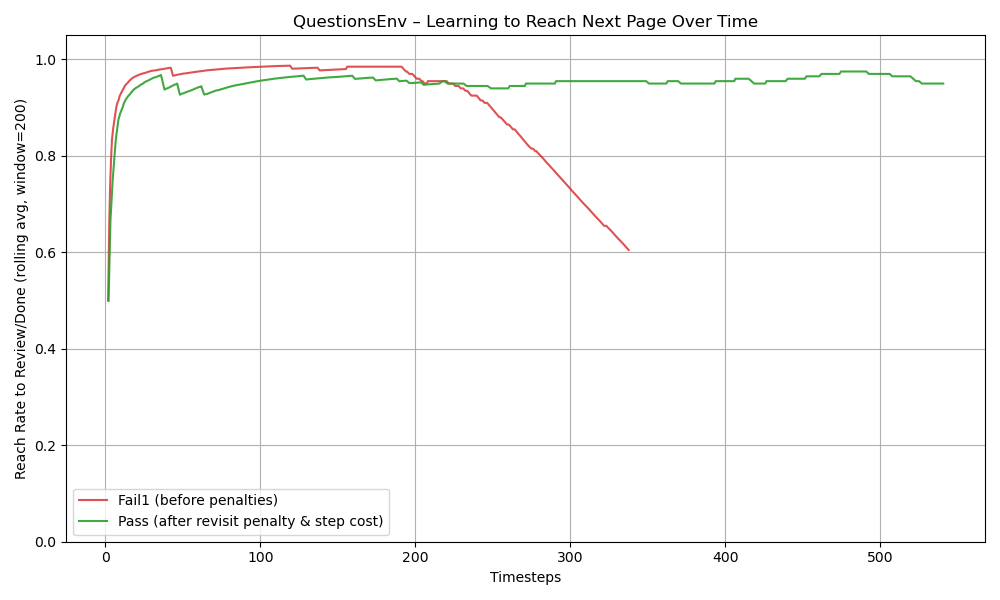

In [34]:
Image(filename="../Analysis/Images/questions_nextpage_rate.png", width=700)

**Observation:**  
This plot compares two reward settings for the Questions environment:
- **Fail1 (red):** Before revisit penalties — the agent eventually regressed and stopped progressing.  
- **Pass (green):** After adding revisit penalties and step costs — the agent maintained a consistent reach rate (~0.95–1.0).  

**Findings:**  
- Without penalties, the agent exploited rewards by reselecting the same dropdowns repeatedly.  
- After tuning, the agent learned to **advance properly to the next page** rather than stagnate.  
- Reward shaping effectively eliminated the “looping” issue, producing **stable and generalized task behavior**.

## Overall Findings

1. **Reward tuning significantly improved both completion and accuracy metrics.**
   - PPO’s episode rewards and match ratios show visible jumps after mid-training reward changes.
   - A2C remained stable but showed less flexibility in adapting to new rewards.

2. **Rolling-window smoothing (200 episodes)** revealed clear convergence trends and removed noise, helping visualize agent learning consistency.

3. **ExperienceEnv and QuestionsEnv analyses** demonstrated how incremental reward shaping addressed task-specific failures:
   - Experience page: encouraged exploration and page transition.
   - Questions page: removed repetitive behavior through revisit penalties.

4. Both agents achieved high completion (>95%) and strong match accuracy (>0.85), confirming that the multi-page RL environment and reward structure successfully trained agents to fill and submit applications autonomously.

---

*All metrics were computed using 200-episode rolling averages to ensure smooth, interpretable trends in long training sessions.*


### Following is the raw data collected during training and reward modifications

In [29]:
import pandas as pd

pd.set_option("display.max_colwidth", None)
df = pd.read_csv("observations.csv")
df


,sects(pass/fail),timesteps,n_steps,actions,comments
0,1(index)-Fail1,2000,128,40,Resulted in negative rewards for most episodes- Terminated before completion
1,1(index)-Pass,2000,256,20,Changed per loop penalty rewards (from 0.07 to 0.05) and added more reward to go to next page(5 to 20)
2,2(experience)-Fail1,10000,256,200,Resulted in convergence to the same page and not learning to move to next page - Terminated before completion
3,2(experience)-Fail2,50000,256,50,Changed rewards to encourage page transitions (from 5 to 30) also increased learning timesteps and timed penalty for more steps (-0.01 for each step). Resulted in Partial completions of the application.
4,2(experience)-Pass,50000,256,50,Changed rewards for partial completion (-ve rewards for missing sections)
5,3(questions)-Fail1,10000,256,20,Resulted in convergence to the same page and not learning to move to next page agent was reselecting the same opptions to gain points
6,3(questions)-Pass,10000,256,40,Changed the logic to give penalty if the agent revisits a question it has already answered increase rewards for next page (from 10 to 30) and increased steps per episode. Increased timed penalty for step (-0.05 to -1)
7,4(review)-Pass,100,10,10,Submission was passing
8,Full-PPO-Fail1,100000,256,per-env,Resulted in agent learning to finish an episode early by collecting points at first page and not moving forward
9,Full-PPO-Pass,100000,256,per-env,Index env was favouring clicking submit and failing changed rewards for index and and added rewards for ratio of completed files by percentage of tiers
